In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the data
data  = pd.read_excel('pone.0212445.s004.xlsx', header=[1])
data

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL
0,Buffalo City,BUF,Survey,13.600000,10.268000,16.932000,102437,77340,127534
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691
2,City of Cape Town,CPT,Survey,5.200000,3.044000,7.356000,200751,117517,283985
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548
4,West Coast,DC1,Survey,2.700000,0.000000,5.444000,11302,0,22789
...,...,...,...,...,...,...,...,...,...
99,Mangaung,MAN,Fay-Heriott,9.147425,6.725917,12.325536,101520,74646,136792
100,Nelson Mandela Bay Metro,NMA,Survey,8.300000,3.400000,13.200000,97459,39923,154995
101,Nelson Mandela Bay Metro,NMA,Fay-Heriott,9.054060,6.128703,13.179704,106313,71964,154757
102,City of Tshwane,TSH,Survey,11.700000,7.388000,16.012000,361450,228239,494661


In [3]:
# No missing values
data.isna().sum()

District          0
Code              0
Estimate          0
Prevalence_%      0
Prevalence_LCL    0
Prevalence_UCL    0
NoPLHIV           0
NoPLHIV_LCL       0
NoPLHIV_UCL       0
dtype: int64

In [4]:
# Checking for district names
data.District.unique()

array(['Buffalo City', 'City of Cape Town', 'West Coast', 'Cacadu',
       'Amatole', 'Chris Hani', 'Joe Gqabi', 'O.R. Tambo', 'Xhariep',
       'Lejweleputswa', 'Thabo Mofutsanyana', 'Cape Winelands',
       'Fezile Dabi', 'Ugu', 'uMgungundlovu', 'uThukela', 'uMzinyathi',
       'Amajuba', 'Zululand', 'uMkhanyakude', 'uThungulu', 'iLembe',
       'Overberg', 'Gert Sibande', 'Nkangala', 'Ehlanzeni', 'Mopani',
       'Vhembe', 'Capricorn', 'Waterberg', 'Bojanala Platinum',
       'Ngaka Modiri Molema', 'Dr Ruth Segomotsi Mompati', 'Eden',
       'Dr Kenneth Kaunda', 'Sedibeng', 'Sisonke', 'Alfred Nzo',
       'John Taolo Gaetsewe', 'Sekhukhune', 'West Rand', 'Central Karoo',
       'Namakwa', 'Pixley ka Seme', 'Siyanda', 'Frances Baard',
       'Ekurhuleni', 'eThekwini', 'City of Johannesburg', 'Mangaung',
       'Nelson Mandela Bay Metro', 'City of Tshwane'], dtype=object)

In [5]:
# Checking for estimate column 
data.Estimate.unique()

array(['Survey', 'Fay-Heriott'], dtype=object)

## Number of people living with HIV according to Survey estimate

In [6]:
# Filter for survey
survey_data = data[data.Estimate =='Survey']

#Number of people living with HIV according to Survey estimate
survey_data.groupby(['District']).agg({'NoPLHIV':'sum'}).head()

,NoPLHIV
District,
Alfred Nzo,104363
Amajuba,82210
Amatole,98884
Bojanala Platinum,212904
Buffalo City,102437


## Avarage Number of people living with HIV of the two estimates used for Xhariep

In [7]:
xhariep = data[data.District == 'Xhariep']

xhariep.groupby(['District','Estimate'])['NoPLHIV'].mean().to_frame()

NoPLHIV
District Estimate            
Xhariep  Fay-Heriott    12718
         Survey         11777

In [9]:
data.columns.str.replace('[_,%]','')

/Users/chuene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


Index(['District', 'Code', 'Estimate', 'Prevalence', 'PrevalenceLCL',
       'PrevalenceUCL', 'NoPLHIV', 'NoPLHIVLCL', 'NoPLHIVUCL'],
      dtype='object')

## Add a column and populate it with the number of people not living with HIV for each row.



In [ ]:
# Change the prevelance percentage to decimal
prevelance_percentage = data['Prevalence_%'] / 100

# Calculate the new column with reverse percentage to get the total number of people not living with HIV
data['NoP_Not_LHIV'] = data['NoPLHIV'] / prevelance_percentage
data

## What is the total NoPLHIV in all the cities (districts with “city” or “metro” in the name)?

In [ ]:
# Empty list to collect the cities with name city and metro only
cities = []


for district in data.District.unique():
    if 'City' in district:
        cities.append(district)
    if 'Metro' in district:
        cities.append(district)

data.groupby('District').agg({'NoPLHIV':'sum'}).apply(cities)

## Remove all the special/non-alphabetic characters from the dataframe column names. 
## Print the resultant field names output. 




In [12]:
clean_data_cols = data.columns.str.replace('[_,%]','')
clean_data_cols

/Users/chuene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


Index(['District', 'Code', 'Estimate', 'Prevalence', 'PrevalenceLCL',
       'PrevalenceUCL', 'NoPLHIV', 'NoPLHIVLCL', 'NoPLHIVUCL'],
      dtype='object')

## Using matplotlib, plot each Prevalence confidence interval (Prevalence_UCL and Prevalence_LCL) 
## for Districts that end in “i”; 
## according to Fay-Herriott estimates on 1 graph.

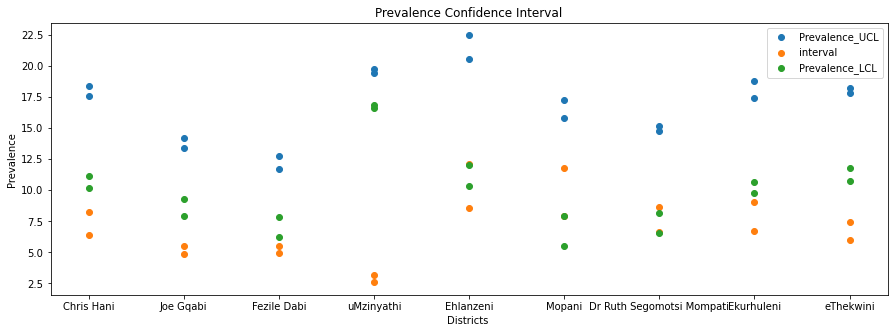

In [13]:
name = []
for district in data.District.unique():
    if district.endswith('i'):
        name.append(district)
        
data_bool = data.District.isin(name)
filtered_data = data[data_bool]
filtered_data

interval = filtered_data.Prevalence_UCL - filtered_data.Prevalence_LCL

plt.figure(figsize=(15,5))
plt.scatter(filtered_data.District,filtered_data.Prevalence_UCL, label='Prevalence_UCL')
plt.scatter(filtered_data.District,interval, label='interval')
plt.scatter(filtered_data.District,filtered_data.Prevalence_LCL, label='Prevalence_LCL')
plt.title('Prevalence Confidence Interval')
plt.ylabel('Prevalence')
plt.xlabel('Districts ')
plt.legend()